In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [316]:
df = pd.read_csv('Minggu 3/data/insurance.csv')

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [317]:
le = LabelEncoder()

df['smoker'] = le.fit_transform(df['smoker'])

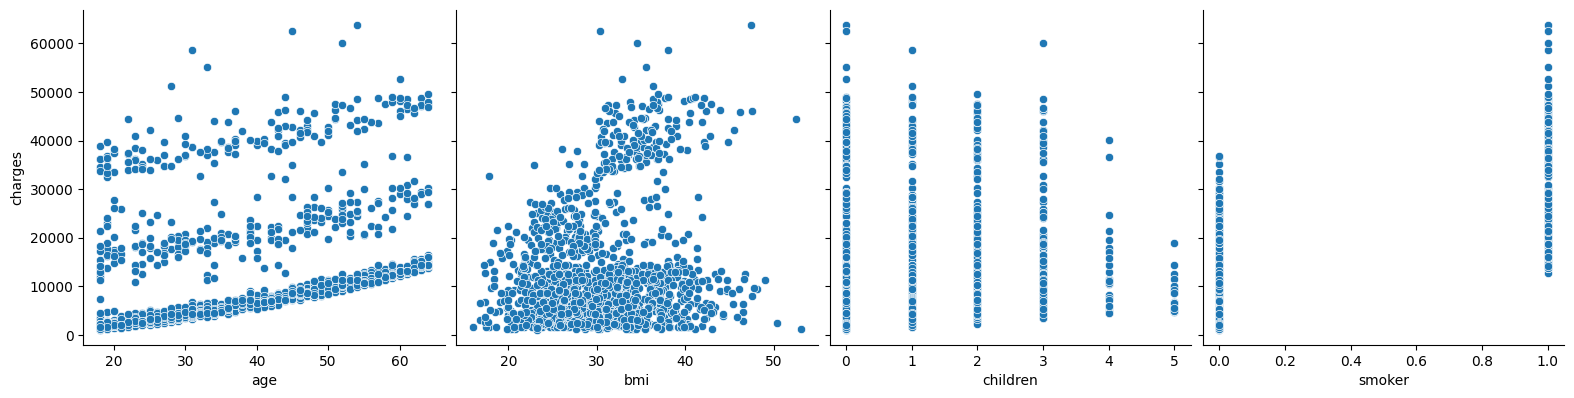

In [318]:
sns.pairplot(df, x_vars=['age', 'bmi', 'children', 'smoker'],
             y_vars='charges', height=4, aspect=1, kind='scatter')

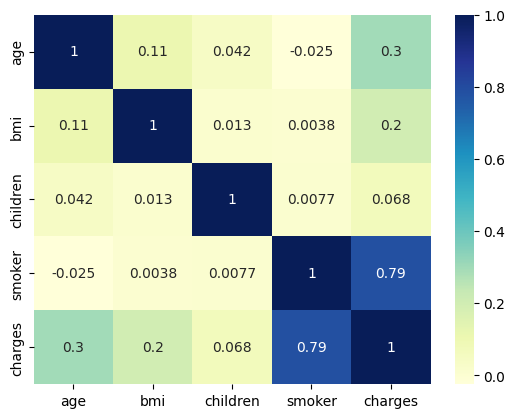

In [319]:
sns.heatmap(df.corr(numeric_only=True),cmap='YlGnBu', annot=True)
plt.show()

### Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

Variabel-variabel yang digunakan sebagai fitur adalah:
- age
- bmi
- smoker

karena pada grafik heatmap diatas age mendapatkan nilai 0,3 lalu bmi 0,2 dan smoker 0,79 dari nilai-nilai tersebut mengartikan bahwa variabel-variabel tersebut memiliki hubungan dengan biaya medis personal.

Variabel-variabel yang digunakan sebagai target adalah:
- charges (biaya medis personal)

In [320]:
X = df[['age', 'bmi','smoker']]
y = df[['charges']]

In [321]:
X

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [322]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


### Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Lakukan feature scaling jika diperlukan.

In [324]:
from sklearn.preprocessing import StandardScaler

scaller_X = StandardScaler()
scaller_y = StandardScaler()

X_scaled = scaller_X.fit_transform(X)
y_scaled = scaller_y.fit_transform(y)

Karena nilai X dan y memiliki rentang yang berbeda maka perlu dilakukan normalisasi untuk memberikan nilai yang sama untuk setiap variabel.

In [325]:
X_scaled

array([[-1.43876426, -0.45332   ,  1.97058663],
       [-1.50996545,  0.5096211 , -0.5074631 ],
       [-0.79795355,  0.38330685, -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.5074631 ],
       [-1.29636188, -0.79781341, -0.5074631 ],
       [ 1.55168573, -0.26138796,  1.97058663]])

In [326]:
y_scaled

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

### Buat model multiple linear regression menggunakan Scikit-Learn.

In [327]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled, y_scaled)

LinearRegression()

### Latih model pada data latih dan lakukan prediksi pada data uji.

In [328]:
X_train_scaled = scaller_X.fit_transform(X_train)
X_test_scaled = scaller_X.transform(X_test)
y_train_scaled = scaller_y.fit_transform(y_train)
y_test_scaled = scaller_y.transform(y_test)

### Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [329]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y_test_scaled
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_actual, y_pred)

mse = mean_squared_error(y_actual, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_actual, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)

MAE:  0.35457611264670447
MSE:  0.2392104677324373
RMSE:  0.4890914717437192
R-squared:  0.7776077596229856
